<a href="https://colab.research.google.com/github/cyss93/CP1_team8/blob/%EC%98%A4%EC%B0%BD%EC%98%81/Concentration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import scipy.stats as stats

In [ ]:
# # 한글 깨짐 방지
# # 아래 코드 실행 후 런타임 재시작 및 코드 실행 해주어야함
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

In [ ]:
# copy 경고 무시
pd.set_option('mode.chained_assignment',  None)

In [ ]:
df_customer = pd.read_csv('olist_customers_dataset.csv')
df_sellers = pd.read_csv('olist_sellers_dataset.csv')
df_products = pd.read_csv('olist_products_dataset.csv')
df_orders = pd.read_csv('olist_orders_dataset.csv')
df_order_items = pd.read_csv('olist_order_items_dataset.csv')

### 산업/지역/제품 집중도
- 산업별, 지역별, 제품별 집중도가 어떻게 되는지 확인해보고, 판매자들의 다양성이 어떤지 확인하고자 하였다.
- 먼저 제품 카테고리 비율이 분기별로 어떤 차이를 보이는지 확인해본 후, GMV와 연관지어 확인해보려 한다.

In [ ]:
df_products['product_category_name'].value_counts()

cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: product_category_name, Length: 73, dtype: int64

### 제품군(category) 별
- 판매량 및 수익을 보기 위해선, df_orders와 df_order_items, df_producst를 merge. (pk로 order_id와 products_id를 차례로 사용)
- 날짜와 카테고리를 모든 주문 건수 별로 구할 수 있다.

In [ ]:
# df_orders와 df_order_items merge
df_for_cate_temp = pd.merge(df_orders, df_order_items, how = 'inner', on = 'order_id') # 양쪽에 모두 존재하는 값들만 가져오기위해 inner 사용

In [ ]:
df_for_cate_temp

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10
112646,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02
112647,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59
112648,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59


In [ ]:
df_for_cate = pd.merge(df_for_cate_temp, df_products, how = 'inner', on = 'product_id') # 여기도 역시 양쪽에 모두 존재하는 값들만 가져오기

In [ ]:
df_for_cate

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1,87285b34884572647811a353c7ac498a,...,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1,87285b34884572647811a353c7ac498a,...,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13 00:00:00,1,87285b34884572647811a353c7ac498a,...,29.99,14.10,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
4,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,...,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,2017-08-10 21:21:07,2017-08-10 21:35:26,2017-08-18 16:42:51,2017-08-23 15:36:29,2017-08-31 00:00:00,1,0df37da38a30a713453b03053d60d3f7,...,356.00,18.12,esporte_lazer,53.0,1105.0,1.0,2800.0,28.0,23.0,23.0
112646,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,2017-08-10 21:21:07,2017-08-10 21:35:26,2017-08-18 16:42:51,2017-08-23 15:36:29,2017-08-31 00:00:00,2,0df37da38a30a713453b03053d60d3f7,...,356.00,18.12,esporte_lazer,53.0,1105.0,1.0,2800.0,28.0,23.0,23.0
112647,cfa78b997e329a5295b4ee6972c02979,a2f7428f0cafbc8e59f20e1444b67315,delivered,2017-12-20 09:52:41,2017-12-20 10:09:52,2017-12-20 20:25:25,2018-01-26 15:45:14,2018-01-18 00:00:00,1,3d2c44374ee42b3003a470f3e937a2ea,...,55.90,15.14,instrumentos_musicais,34.0,372.0,2.0,300.0,16.0,6.0,12.0
112648,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,1,ac35486adb7b02598c182c2ff2e05254,...,72.00,13.08,beleza_saude,50.0,1517.0,1.0,1175.0,22.0,13.0,18.0


In [ ]:
# 데이터셋의 컬럼들
df_for_cate.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm'],
      dtype='object')

In [ ]:
# 제품 category들을 묶어줄 수 있을지 먼저 살펴보자
df_for_cate['product_category_name'].unique()

array(['utilidades_domesticas', 'perfumaria', 'automotivo', 'pet_shop',
       'papelaria', nan, 'moveis_decoracao', 'moveis_escritorio',
       'ferramentas_jardim', 'informatica_acessorios', 'cama_mesa_banho',
       'brinquedos', 'construcao_ferramentas_construcao', 'telefonia',
       'beleza_saude', 'eletronicos', 'bebes', 'cool_stuff',
       'relogios_presentes', 'climatizacao', 'esporte_lazer',
       'livros_interesse_geral', 'eletroportateis', 'alimentos',
       'malas_acessorios', 'fashion_underwear_e_moda_praia',
       'artigos_de_natal', 'fashion_bolsas_e_acessorios',
       'instrumentos_musicais', 'construcao_ferramentas_iluminacao',
       'livros_tecnicos', 'construcao_ferramentas_jardim',
       'eletrodomesticos', 'market_place', 'agro_industria_e_comercio',
       'artigos_de_festas', 'casa_conforto', 'cds_dvds_musicais',
       'industria_comercio_e_negocios', 'consoles_games', 'moveis_quarto',
       'construcao_ferramentas_seguranca', 'telefonia_fixa', 'bebidas

In [ ]:
# 기준 없이 8개의 대분류로 나누어보자(big_product_category_name)
# 이후 회의를 통해 대분류 통일
cate_1 = ['utilidades_domesticas', 'perfumaria', 'automotivo', 'pet_shop',
       'papelaria', 'moveis_decoracao', 'moveis_escritorio',
       'ferramentas_jardim', 'informatica_acessorios', 'cama_mesa_banho']

cate_2 = ['brinquedos', 'construcao_ferramentas_construcao', 'telefonia',
       'beleza_saude', 'eletronicos', 'bebes', 'cool_stuff',
       'relogios_presentes', 'climatizacao', 'esporte_lazer']

cate_3 = ['livros_interesse_geral', 'eletroportateis', 'alimentos',
       'malas_acessorios', 'fashion_underwear_e_moda_praia',
       'artigos_de_natal', 'fashion_bolsas_e_acessorios']

cate_4 = ['instrumentos_musicais', 'construcao_ferramentas_iluminacao',
       'livros_tecnicos', 'construcao_ferramentas_jardim',
       'eletrodomesticos', 'market_place', 'agro_industria_e_comercio']

cate_5 = ['artigos_de_festas', 'casa_conforto', 'cds_dvds_musicais',
       'industria_comercio_e_negocios', 'consoles_games', 'moveis_quarto',
       'construcao_ferramentas_seguranca', 'telefonia_fixa', 'bebidas']

cate_6 = ['moveis_cozinha_area_de_servico_jantar_e_jardim',
       'fashion_calcados', 'casa_construcao', 'audio',
       'eletrodomesticos_2', 'fashion_roupa_masculina', 'cine_foto',]

cate_7 = ['moveis_sala', 'artes', 'alimentos_bebidas',
       'tablets_impressao_imagem', 'fashion_esporte',
       'portateis_cozinha_e_preparadores_de_alimentos', 'la_cuisine',
       'flores', 'pcs', 'casa_conforto_2', 'portateis_casa_forno_e_cafe']
       
cate_8 = ['dvds_blu_ray', 'pc_gamer', 'construcao_ferramentas_ferramentas',
       'fashion_roupa_feminina', 'moveis_colchao_e_estofado',
       'sinalizacao_e_seguranca', 'fraldas_higiene', 'livros_importados',
       'fashion_roupa_infanto_juvenil', 'musica', 'artes_e_artesanato',
       'seguros_e_servicos']

In [ ]:
# big_product_category_name 컬럼 생성 (대분류를 위한 컬럼)
df_for_cate['big_product_category_name'] = 'No Category'

In [ ]:
# 카테고리별 라벨링하기 위한 함수
# big_product_category_name에 라벨링

def classify_category(df):
  for i in range(len(df['product_category_name'])):
    if df['product_category_name'][i] in cate_1:
      df['big_product_category_name'][i] = 'cate_1'

    elif df['product_category_name'][i] in cate_2:
      df['big_product_category_name'][i] = 'cate_2'

    elif df['product_category_name'][i] in cate_3:
      df['big_product_category_name'][i] = 'cate_3'

    elif df['product_category_name'][i] in cate_4:
      df['big_product_category_name'][i] = 'cate_4'

    elif df['product_category_name'][i] in cate_5:
      df['big_product_category_name'][i] = 'cate_5'

    elif df['product_category_name'][i] in cate_6:
      df['big_product_category_name'][i] = 'cate_6'

    elif df['product_category_name'][i] in cate_7:
      df['big_product_category_name'][i] = 'cate_7'

    elif df['product_category_name'][i] in cate_8:
      df['big_product_category_name'][i] = 'cate_8'

    else:
      df['big_product_category_name'][i] = 'No_category'

In [ ]:
classify_category(df_for_cate)

In [ ]:
df_for_cate

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,big_product_category_name
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,cate_1
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1,87285b34884572647811a353c7ac498a,...,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,cate_1
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1,87285b34884572647811a353c7ac498a,...,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,cate_1
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13 00:00:00,1,87285b34884572647811a353c7ac498a,...,14.10,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,cate_1
4,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,...,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,cate_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,2017-08-10 21:21:07,2017-08-10 21:35:26,2017-08-18 16:42:51,2017-08-23 15:36:29,2017-08-31 00:00:00,1,0df37da38a30a713453b03053d60d3f7,...,18.12,esporte_lazer,53.0,1105.0,1.0,2800.0,28.0,23.0,23.0,cate_2
112646,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,2017-08-10 21:21:07,2017-08-10 21:35:26,2017-08-18 16:42:51,2017-08-23 15:36:29,2017-08-31 00:00:00,2,0df37da38a30a713453b03053d60d3f7,...,18.12,esporte_lazer,53.0,1105.0,1.0,2800.0,28.0,23.0,23.0,cate_2
112647,cfa78b997e329a5295b4ee6972c02979,a2f7428f0cafbc8e59f20e1444b67315,delivered,2017-12-20 09:52:41,2017-12-20 10:09:52,2017-12-20 20:25:25,2018-01-26 15:45:14,2018-01-18 00:00:00,1,3d2c44374ee42b3003a470f3e937a2ea,...,15.14,instrumentos_musicais,34.0,372.0,2.0,300.0,16.0,6.0,12.0,cate_4
112648,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,1,ac35486adb7b02598c182c2ff2e05254,...,13.08,beleza_saude,50.0,1517.0,1.0,1175.0,22.0,13.0,18.0,cate_2


In [ ]:
# 분기별로 나누기
## 분기별로 나눈 뒤에 카테고리 별로 나누자 (필터링)
mask_16_4 = (df_for_cate['order_estimated_delivery_date'] > '2016-10-01') & (df_for_cate['order_estimated_delivery_date'] <= '2016-12-31')
mask_17_1 = (df_for_cate['order_estimated_delivery_date'] > '2017-01-01') & (df_for_cate['order_estimated_delivery_date'] <= '2017-03-31')
mask_17_2 = (df_for_cate['order_estimated_delivery_date'] > '2017-04-01') & (df_for_cate['order_estimated_delivery_date'] <= '2017-06-31')
mask_17_3 = (df_for_cate['order_estimated_delivery_date'] > '2017-07-01') & (df_for_cate['order_estimated_delivery_date'] <= '2017-09-31')
mask_17_4 = (df_for_cate['order_estimated_delivery_date'] > '2017-10-01') & (df_for_cate['order_estimated_delivery_date'] <= '2017-12-31')
mask_18_1 = (df_for_cate['order_estimated_delivery_date'] > '2018-01-01') & (df_for_cate['order_estimated_delivery_date'] <= '2018-03-31')
mask_18_2 = (df_for_cate['order_estimated_delivery_date'] > '2018-04-01') & (df_for_cate['order_estimated_delivery_date'] <= '2018-06-31')
mask_18_3 = (df_for_cate['order_estimated_delivery_date'] > '2018-06-01') & (df_for_cate['order_estimated_delivery_date'] <= '2018-06-31')

In [ ]:
# 필터 적용
df_16_4_cate = df_for_cate.loc[mask_16_4]
df_17_1_cate = df_for_cate.loc[mask_17_1]
df_17_2_cate = df_for_cate.loc[mask_17_2]
df_17_3_cate = df_for_cate.loc[mask_17_3]
df_17_4_cate = df_for_cate.loc[mask_17_4]
df_18_1_cate = df_for_cate.loc[mask_18_1]
df_18_2_cate = df_for_cate.loc[mask_18_2]
df_18_3_cate = df_for_cate.loc[mask_18_3]

In [ ]:
# 17_2분기 데이터
df_17_2_cate

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,big_product_category_name
158,2804b32d150c753fbd49da4d9c0c3158,5d86d96c2e0dcf2821a9f5b082e8bcc9,delivered,2017-04-11 14:17:17,2017-04-11 14:30:07,2017-04-13 09:35:44,2017-04-20 14:45:04,2017-05-09 00:00:00,2,060cb19345d90064d1015407193c233d,...,24.15,automotivo,49.0,608.0,1.0,7150.0,65.0,10.0,65.0,cate_1
161,6a022aedc6fb8597eddd4b1ed70d14f7,97a1a7d434c0aec55e81662dcc0779be,delivered,2017-05-18 12:42:52,2017-05-18 13:10:25,2017-05-19 13:07:24,2017-06-06 05:23:30,2017-05-31 00:00:00,1,060cb19345d90064d1015407193c233d,...,14.41,automotivo,49.0,608.0,1.0,7150.0,65.0,10.0,65.0,cate_1
164,68f990d7575ee4ce6070c8816664910c,5e4fd80186282f6f16f454b24fed62e6,delivered,2017-05-24 14:37:44,2017-05-24 14:45:15,2017-05-26 10:03:31,2017-06-08 06:54:57,2017-06-16 00:00:00,1,060cb19345d90064d1015407193c233d,...,27.36,automotivo,49.0,608.0,1.0,7150.0,65.0,10.0,65.0,cate_1
166,f31cf521d461f5b8b5b1456a0448495e,7d9fd47eeb21776ed93f070d71499e0a,delivered,2017-05-28 15:50:05,2017-05-29 21:45:10,2017-05-31 09:07:45,2017-06-07 11:51:24,2017-06-21 00:00:00,1,060cb19345d90064d1015407193c233d,...,21.27,automotivo,49.0,608.0,1.0,7150.0,65.0,10.0,65.0,cate_1
170,0cbd2aa629e9ecbbcf518a10e247414f,b777e264df0b508f453971fb87c2a0b7,delivered,2017-03-27 20:40:27,2017-03-27 22:15:18,2017-03-28 10:22:55,2017-04-06 15:37:55,2017-04-18 00:00:00,2,060cb19345d90064d1015407193c233d,...,21.88,automotivo,49.0,608.0,1.0,7150.0,65.0,10.0,65.0,cate_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112618,46b4a41ba02248ac63e0d85649595f7e,7289387e125fb55957fab19cf6049956,delivered,2017-05-16 23:24:13,2017-05-16 23:35:21,2017-05-17 09:17:58,2017-05-24 12:59:35,2017-06-08 00:00:00,1,a16485b933e24a0ee5f137fec64c48d2,...,13.82,brinquedos,60.0,999.0,2.0,1094.0,26.0,18.0,29.0,cate_2
112620,67efc48800e617879edb36f04f815c59,6eac56572e999fbdb8f2dfef5403438f,delivered,2017-06-17 15:26:32,2017-06-17 15:42:41,2017-06-19 21:47:25,2017-06-24 08:31:30,2017-06-30 00:00:00,1,926454d19f2417167bf0a9488af66a4a,...,17.48,esporte_lazer,40.0,1397.0,3.0,5000.0,100.0,9.0,23.0,cate_2
112621,67efc48800e617879edb36f04f815c59,6eac56572e999fbdb8f2dfef5403438f,delivered,2017-06-17 15:26:32,2017-06-17 15:42:41,2017-06-19 21:47:25,2017-06-24 08:31:30,2017-06-30 00:00:00,2,926454d19f2417167bf0a9488af66a4a,...,17.48,esporte_lazer,40.0,1397.0,3.0,5000.0,100.0,9.0,23.0,cate_2
112639,9b7fd5b0ef330dcbbb6397e5971faeec,4442f152efb5f70fd55dcd6267d1afa4,delivered,2017-05-17 15:48:44,2017-05-17 16:15:16,2017-05-18 13:30:39,2017-05-29 15:18:32,2017-06-08 00:00:00,1,afb83a05bfcf46258f04ce060671d5b4,...,15.10,telefonia_fixa,49.0,709.0,5.0,150.0,17.0,3.0,12.0,cate_5


In [ ]:
# 대분류로 분류한 데이터를 카테고리별 분포를 알아보기 위한 함수입니다.
# 파이차트로 각 대분류가 차지하는 비율을 시각화 해보았습니다.

def PieChart_category(df): # 원하는 분기 데이터 입력 (ex: df_17_2_cate)
  # 대분류로 분류된 판매자들을 분류별로 갯수 세기
  df_cnt = pd.DataFrame(df['big_product_category_name'].value_counts())

  # 컬럼 명 바꿔주기 (cnt로)
  df_cnt.rename(columns = {'big_product_category_name':'cnt'}, inplace = True)

  # 데이터프레임 인덱스 정리
  df_cnt = df_cnt.reset_index()


  # 그래프 그리기
  # 모든 카테고리 그래프
  labels = df_cnt['index']

  fig = plt.figure(figsize=(7,7)) ## 캔버스 생성
  fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
  ax = fig.add_subplot() ## 프레임 생성

  pie = ax.pie(df_cnt['cnt'], 
              startangle = 90, 
              autopct = '%1.1f%%',
              # explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05],
              textprops = {'size' : 13})
  plt.axis('equal')
  plt.legend(pie[0],labels, loc='upper left')
  plt.title('전체 카테고리 비율')
  plt.show()

  # 상위 5개 카테고리 그래프
  labels = df_cnt['index'][:5]

  fig = plt.figure(figsize=(7,7)) ## 캔버스 생성
  fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
  ax = fig.add_subplot() ## 프레임 생성

  pie = ax.pie(df_cnt['cnt'][:5], 
              startangle = 90, 
              autopct = '%1.1f%%',
              # explode = [0.05, 0.05, 0.05, 0.05, 0.05],
              textprops = {'size' : 13})
  plt.axis('equal')
  plt.legend(pie[0],labels, loc='upper right')
  plt.title('상위 5개 카테고리 비율')
  plt.show()


[16_4분기]


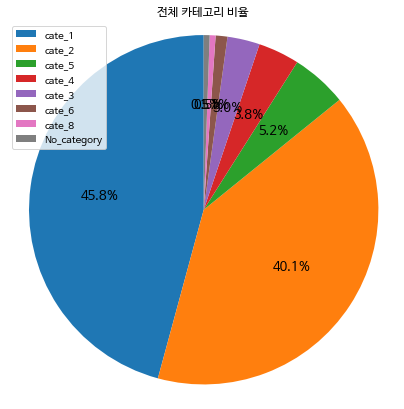

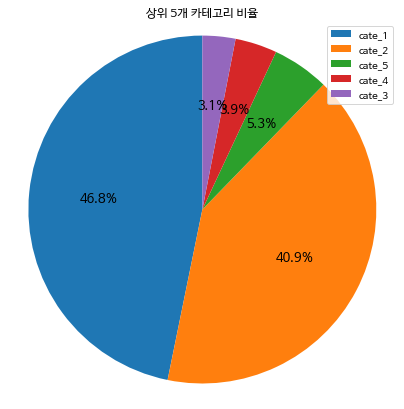


[17_1분기]


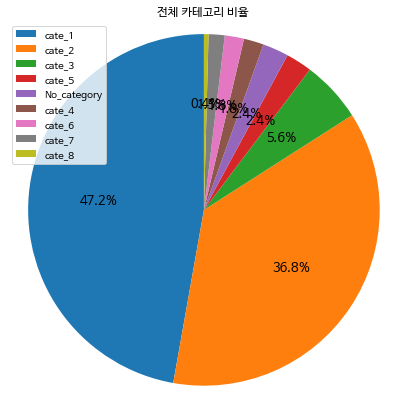

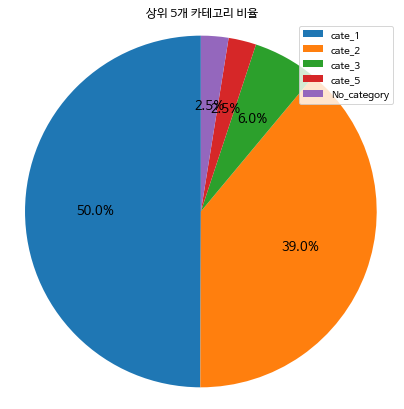


[17_2분기]


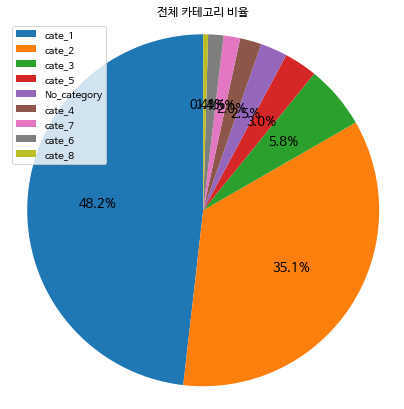

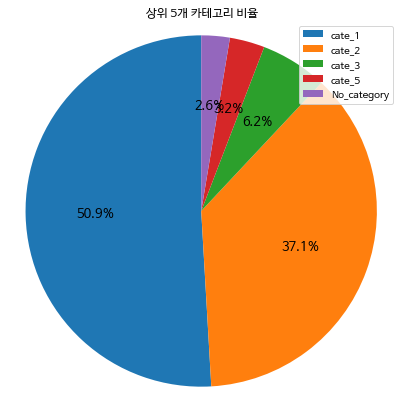


[17_3분기]


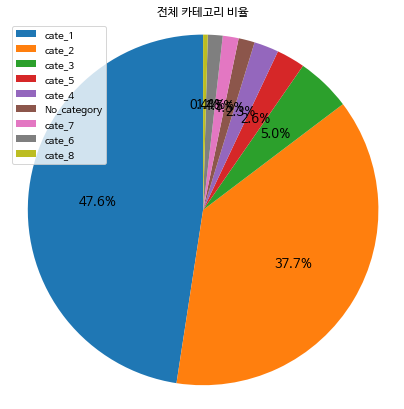

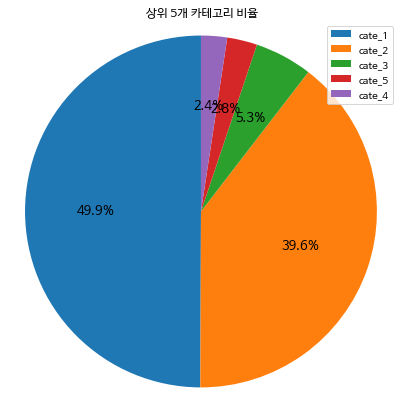


[17_4분기]


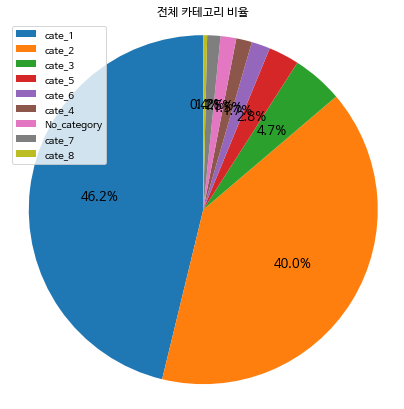

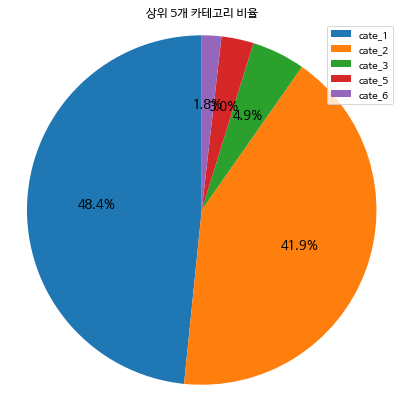


[18_1분기]


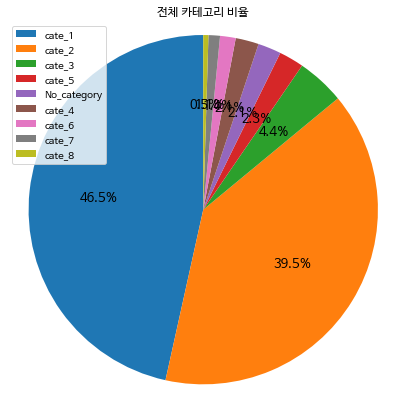

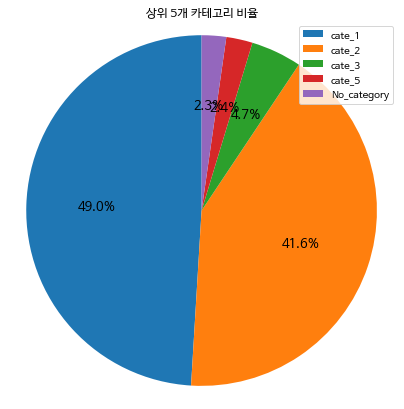


[18_2분기]


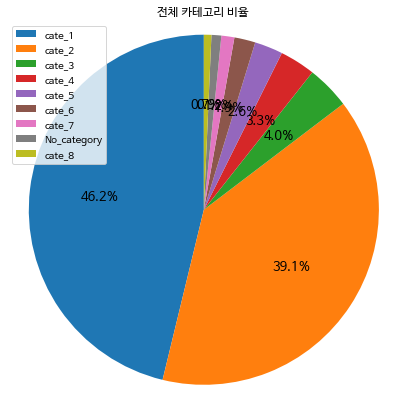

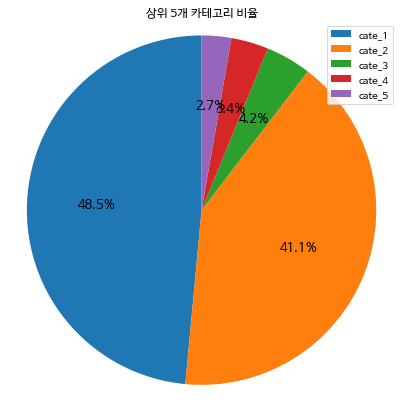


[18_3분기]


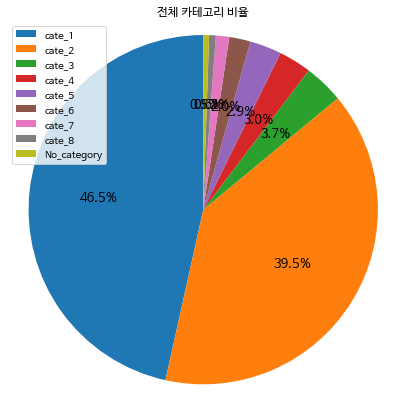

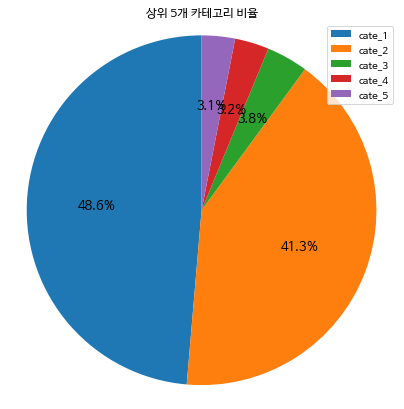

In [ ]:
# 각 분기별 그래프
print('\n[16_4분기]')
PieChart_category(df_16_4_cate)

print('\n[17_1분기]')
PieChart_category(df_17_2_cate)

print('\n[17_2분기]')
PieChart_category(df_17_1_cate)

print('\n[17_3분기]')
PieChart_category(df_17_3_cate)

print('\n[17_4분기]')
PieChart_category(df_17_4_cate)

print('\n[18_1분기]')
PieChart_category(df_18_1_cate)

print('\n[18_2분기]')
PieChart_category(df_18_2_cate)

print('\n[18_3분기]')
PieChart_category(df_18_3_cate)